# Assignment \#5

## Working with Data in Python

###Michael Cai

**Submitted:** 19th April 2016

This exercise is aimed at developing familiarity with the two primary `pandas` objects. 

* `pd.Series(data, index=index ...)`
* `pd.DataFrame(data, columns=columns, index=index ...)`


In [1]:
#Run this Cell#
%matplotlib inline
import pandas as pd

### Question \#1: Pandas Series

A series is a one-dimensional array-like object containing an array of data and an associated array of data labels (called an `index`). 

* (a) Run the following code and explore the pandas series object
* (b) Answer the questions that are in the cells below marked by `[Q]`


In [2]:
s1 = pd.Series([4,7,-5,3])
s2 = pd.Series([4,7,-5,3], index=['a','b','c','d'])

In [3]:
print(s1)

0    4
1    7
2   -5
3    3
dtype: int64


In [4]:
print(s2)

a    4
b    7
c   -5
d    3
dtype: int64


**[Q]:** What is the different between the `s1` object and the `s2` object

**[A]** The difference between the two objects is that the first one s1 is using the default indices that are built into the pandas Series object (i.e. 0,1,2,3), whereas the second object s2, is using user-specified indices (which in this case are a,b,c,d).

In [5]:
#-Sorting by Value-#
s1.sort_values()

2   -5
3    3
0    4
1    7
dtype: int64

In [6]:
print(s1)

0    4
1    7
2   -5
3    3
dtype: int64


**[Q]** Using the above example - please explain how the sort_values() method behaves.

The sort_values() method sorts the values in the Series object, while maintaining the link between the 'keys' and the 'values', which is why the indices appear to be out of order.

**[Q]** How would you save the object that is sorted by `values`?

In [7]:
s1_sorted = s1.sort_values()

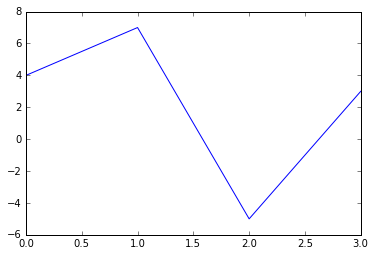

In [8]:
#-Plotting-#
s1.plot()

**[Q]** How would you plot the series that is sorted by values. [**Hint** Use the new sorted pandas series you saved above and pay particular attention to the index values.] Reconstruct the image shown below.

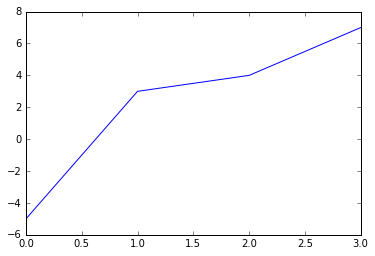

In [10]:
from IPython.display import Image
Image('./assignment5-question1-image1.png')

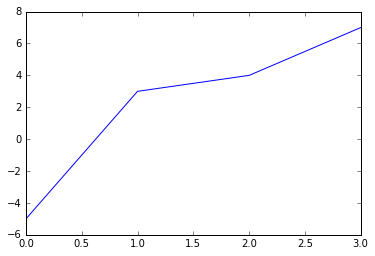

In [13]:
s1_sorted.plot(use_index=False)

**[Q]** Explore the Series Object. Work with **two** methods below that you find interesting. 

In [18]:
s1.append(s2)

0    4
1    7
2   -5
3    3
a    4
b    7
c   -5
d    3
dtype: int64

In [19]:
s1.cumsum()

0     4
1    11
2     6
3     9
dtype: int64

========================================================================

### Qustion \#2: Pandas DataFrame

**DataFrame** is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects.

**Different Representations of Data**

In [20]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)

In [21]:
df

,one,two
a,1,1
b,2,2
c,3,3
d,NaN,4


**[Q]** Explain how the `dict()` object **d** is being interpreted by Pandas when constructing the dataframe. 

**[A]** the dict() object d has keys 'one' and 'two' and the corresponding values are series with alphabetical indexes, thus when Pandas constructs the dataframe it uses the keys of the dict as the column indexes and the indices of the series as the row index.

**[Q]** How else might you represent the original data to construct the same dataframe using only ``lists`` rather than a ``dict`` of ``pd.Series``.

In [49]:
import numpy as np

d = {"one" : [1.,2.,3.,np.nan],
     "two" : [1.,2.,3.,4.]}
i = ['a','b','c','d']
df = pd.DataFrame(data = d, index = i)
df

,one,two
a,1,1
b,2,2
c,3,3
d,NaN,4


#### Indexing and Values

**[Q]** Using a fresh copy of `df` as is defined below. How would you change the value from `2` to `100` in the column that is indexed by `two`?. Do **not** change the original data -- manipulate the dataframe object

The resulting DataFrame should look like

||one|two|
|-|---|---|
|a|	1 |	1 |
|b|	2 |	100|
|c|	3 |	3 |
|d|	NaN|4 |



In [51]:
#-Fresh Copy of df-#
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df

,one,two
a,1,1
b,2,2
c,3,3
d,NaN,4


In [53]:
df['two']['b']=100
df

,one,two
a,1,1
b,2,100
c,3,3
d,NaN,4


#### Working with Data

Using the following GDP per person (in 1000's of US Dollars) from 2008 to 2014 from the IMF's *World Economic Outlook* database

In [54]:
import pandas as pd
data = {'BRA': [13.37, 13.30, 14.34, 15.07, 15.46, 15.98, 16.10],
        'JPN': [33.43, 31.83, 33.71, 34.29, 35.60, 36.79, 37.39],
        'USA': [48.30, 46.91, 48.31, 49.72, 51.41, 52.94, 54.60],
        'Year': [2008, 2009, 2010, 2011, 2012, 2013, 2014]}
weo  = pd.DataFrame(data)

In [55]:
weo['Year']

0    2008
1    2009
2    2010
3    2011
4    2012
5    2013
6    2014
Name: Year, dtype: int64

**[Q]** How would you set the index of the dataframe object **weo** to be `Year`?

In [57]:
weo.set_index('Year')

,BRA,JPN,USA
Year,,,
2008,13.37,33.43,48.30
2009,13.30,31.83,46.91
2010,14.34,33.71,48.31
2011,15.07,34.29,49.72
2012,15.46,35.60,51.41
2013,15.98,36.79,52.94
2014,16.10,37.39,54.60


**[Q]** How would you plot all three countries timeseries?

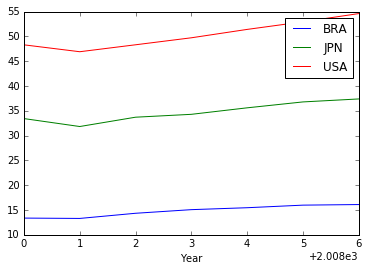

In [66]:
weo.set_index('Year').plot()

**[Q]** How would you plot just the time series for the `USA`? [*Hint:* How do you select data in a dataframe]

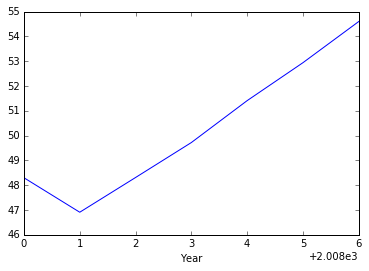

In [68]:
weo.set_index('Year').USA.plot()

**[Q] (Optional - Challenging)** How would you format the plot to show the full year values? (As shown in the image below)

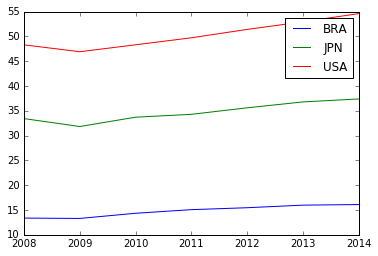

In [80]:
Image('./assignment5-question2-image1.png')

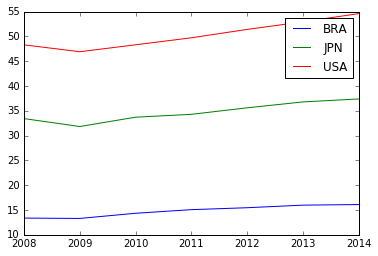

In [99]:
import matplotlib.pyplot as plt

plt.plot(weo.set_index('Year')['BRA'], label='BRA')
plt.plot(weo.set_index('Year')['JPN'], label='JPN')
plt.plot(weo.set_index('Year')['USA'], label='USA')
ax = plt.gca()
ax.legend()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.show()

#### Merging Data

In [100]:
df1 = pd.DataFrame([1., 2., 3.], index=['c', 'b', 'a'], columns=['one'])
df2 = pd.DataFrame([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'], columns=['two'])

In [101]:
df1

,one
c,1
b,2
a,3


In [102]:
df2

,two
a,1
b,2
c,3
d,4


Use the `merge` method to combine these two dataframes.

In [103]:
df = df1.merge(df2, left_index=True, right_index=True)

In [104]:
df

,one,two
a,3,1
b,2,2
c,1,3


**[Q]** Based on the results above. What do you notice about the default *merge* behaviour of Pandas DataFrames?

**[A]** The default merge behaviour matches the left indices (which are shared) between the two dataframe objects; however, in terms of dimensionality, it reduces the dimension of the larger dataframe to match that of the smaller one (thus dropping off the element in the d index since that index is not shared by the smaller dataframe). It also re-orders the indices to be back in the natural alphabetical order (overriding the reverse alphabetical order given by the first dataframe).

**[Q]** How would you alter the merge so that the resultant dataframe contains the full set of data that is defined in the `df2` object?

The resultant dataframe would look like:

| |one|two|
|-|---|---|
|a|	3 |	1 |
|b|	2 |	2 |
|c|	1 |	3 |
|d|	NaN|4 |

In [112]:
df=df1.merge(df2, left_index = True, right_index = True, how = 'outer')
df

,one,two
a,3,1
b,2,2
c,1,3
d,NaN,4


=======================================================================

### Question \#3: World Development Indicators (WDI)

Let's download some WDI data for GDP per Capita (Constant 2005 US$)


In [117]:
from pandas_datareader import data, wb

**[Q]** Explain the above import statement

**[A]** The above import statement imports the libraries, "data", and "wb" from the module pandas_datareader

**Using the `wb` object**

In [119]:
#-Search for GDP per Capita Codes-#
wb.search('gdp.*capita.*const')[['id','name']].head()

,id,name
685,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation..."
7460,NY.GDP.PCAP.KD,GDP per capita (constant 2005 US$)
7462,NY.GDP.PCAP.KN,GDP per capita (constant LCU)
7464,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2011 internation..."


In [120]:
#-Download Data-#
dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'FR', 'AU'],\
                  start=2005, end=2014)

** View the Data **

In [121]:
dat.head()

NY.GDP.PCAP.KD
country   year                
Australia 2014    37867.767415
          2013    37507.976426
          2012    37241.390414
          2011    36560.441167
          2010    36210.356759

In [122]:
dat.index.levels

FrozenList([['Australia', 'France', 'United States'], ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']])

In [123]:
dat.index.names

FrozenList(['country', 'year'])

**[Q]** What type of object is `dat`

In [129]:
#[A]
type(dat)

pandas.core.frame.DataFrame

**[Q]** What type of object is `dat['NY.GDP.PCAP.KD']`

In [130]:
#[A]
type(dat['NY.GDP.PCAP.KD'])

pandas.core.series.Series

**[Q]** What type of object is `dat[['NY.GDP.PCAP.KD']]`

In [131]:
#[A]
type(dat[['NY.GDP.PCAP.KD']])

pandas.core.frame.DataFrame

**[Q]** How would you compute the average GDP per capita over all years for each country? [*Hint* Use the `groupby` method]

In [226]:
dat.groupby(level=0).mean()

,NY.GDP.PCAP.KD
country,
Australia,36160.604062
France,35514.065784
United States,44823.868648


**[Q]** How can we reshape `dat` so that countries are listed as the columns [*Hint:* Might consider using `unstack`, or `pivot_table` methods]

In [173]:
dat.unstack(level='country')

NY.GDP.PCAP.KD                            
country      Australia        France United States
year                                              
2005      33982.950427  34879.726329  44307.920585
2006      34484.127368  35460.013387  45052.921254
2007      35557.110086  36073.518323  45420.187361
2008      36143.475676  35942.538142  44861.390895
2009      36050.444884  34706.326075  43235.558409
2010      36210.356759  35214.132081  43961.168477
2011      36560.441167  35772.881814  44324.944522
2012      37241.390414  35675.971111  45008.614113
2013      37507.976426  35754.651979  45660.733802
2014      37867.767415  35660.898603  46405.247065

**[Q]** How would you plot `Australia's` time series of GDP per Capita

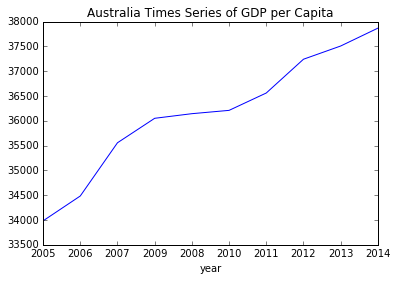

In [314]:
data = dat.reset_index(level=0)
data[0:10]['NY.GDP.PCAP.KD'].sort_values().plot(title = 'Australia Times Series of GDP per Capita')